In [232]:
import pandas as pd

# csv파일 불러오기
df = pd.read_csv('./csv/지역_유형별 신용카드_(단위_억).csv')
df

,"지역, 카테고리",전국_합계,전국_종합소매,전국_ 백화점,전국_ 대형마트/유통전문점,전국_ 슈퍼마켓,전국_ 편의점,전국_ 면세점,전국_전자상거래/통신판매,전국_식료품,...,기타_오락/문화,기타_ 스포츠/오락/여가,기타_ 서적/문구,기타_교육,기타_숙박/음식,기타_ 숙박,기타_ 음식점,기타_공과금/개인 및 전문 서비스,기타_금융/보험,기타_기타
0,2012/11,299970.34,53558.49,13695.10,26123.23,10604.38,1826.54,1309.25,29166.45,4778.33,...,199.11,170.57,28.54,59.54,406.89,32.29,374.60,135.28,149.68,220.67
1,2012/12,310533.02,57731.17,14542.45,28802.59,11308.05,1810.70,1267.38,29971.83,4895.34,...,157.60,129.33,28.27,57.97,421.34,34.17,387.16,133.34,139.66,210.24
2,2013/01,296732.27,51384.80,11189.07,25640.42,11435.88,1778.78,1340.65,28545.80,5024.76,...,148.65,118.30,30.35,70.66,435.66,39.59,396.07,159.48,144.30,230.65
3,2013/02,267365.92,48141.86,9748.40,25035.42,10602.32,1652.60,1103.11,24596.71,5510.28,...,115.72,91.37,24.35,59.00,332.70,24.29,308.40,123.70,126.38,214.44
4,2013/03,295640.18,49572.79,10873.94,24769.86,10904.74,1877.38,1146.88,26704.28,4775.35,...,167.24,129.95,37.29,66.02,376.96,26.64,350.32,129.63,141.08,225.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,2021/12,539935.08,72991.73,16509.80,29238.11,17759.22,8968.91,515.68,132006.30,10014.39,...,48.16,39.11,9.05,33.21,204.97,11.36,193.60,89.73,108.63,99.44
110,2022/01,545394.92,76347.07,16044.01,31659.32,19422.93,8730.99,489.82,131621.64,12855.90,...,43.54,34.25,9.29,35.70,202.78,12.85,189.93,124.77,97.08,115.64
111,2022/02,470296.08,62651.29,12867.77,25751.48,15657.35,7927.86,446.83,119029.37,7986.69,...,38.94,32.40,6.54,29.49,166.96,11.19,155.78,84.38,91.09,88.90
112,2022/03,539346.45,71787.11,14932.79,28682.36,18116.34,9562.31,493.32,134751.97,8896.80,...,59.91,48.73,11.18,33.54,194.62,9.98,184.65,87.45,117.69,105.94


In [233]:
# 날짜 컬럼 "/" 제거
df["지역, 카테고리"] = df["지역, 카테고리"].str.replace("/", "")

In [234]:
# 날짜 컬럼 int 타입으로 변환
df["지역, 카테고리"] = df["지역, 카테고리"].astype(int)

In [235]:
df["지역, 카테고리"] = pd.to_datetime(df["지역, 카테고리"], format='%Y%m')
df["지역, 카테고리"] = df["지역, 카테고리"].dt.strftime('%Y-%m')
df.rename(columns={"지역, 카테고리" : "날짜"}, inplace=True)

In [236]:
credit_sum_df = df.iloc[:, df.columns.str.contains("전국")]
credit_sum_df.columns

Index(['전국_합계', '전국_종합소매', '전국_ 백화점', '전국_ 대형마트/유통전문점', '전국_ 슈퍼마켓', '전국_ 편의점',
       '전국_ 면세점', '전국_전자상거래/통신판매', '전국_식료품', '전국_ 일반식료품', '전국_ 건강보조식품',
       '전국_의류/잡화', '전국_ 의복/직물', '전국_ 복식잡화', '전국_ 시계/귀금속/안경', '전국_ 화장품',
       '전국_연료', '전국_가구/가전', '전국_ 가구', '전국_ 가전제품/정보통신기기', '전국_의료/보건',
       '전국_ 종합병원', '전국_ 일반병의원/기타의료기관', '전국_자동차', '전국_ 국산자동차신품', '전국_ 기타운송수단',
       '전국_ 자동차 부품 및 정비', '전국_여행/교통', '전국_ 여행사/자동차임대', '전국_ 항공사', '전국_ 대중교통',
       '전국_오락/문화', '전국_ 스포츠/오락/여가', '전국_ 서적/문구', '전국_교육', '전국_숙박/음식', '전국_ 숙박',
       '전국_ 음식점', '전국_공과금/개인 및 전문 서비스', '전국_금융/보험', '전국_기타'],
      dtype='object')

In [237]:
credit_sum_df = pd.DataFrame(df, columns=[
        '날짜', '전국_합계', '전국_종합소매', '전국_ 백화점', '전국_ 대형마트/유통전문점', '전국_ 슈퍼마켓', '전국_ 편의점',
       '전국_ 면세점', '전국_전자상거래/통신판매', '전국_식료품', '전국_ 일반식료품', '전국_ 건강보조식품',
       '전국_의류/잡화', '전국_ 의복/직물', '전국_ 복식잡화', '전국_ 시계/귀금속/안경', '전국_ 화장품',
       '전국_연료', '전국_가구/가전', '전국_ 가구', '전국_ 가전제품/정보통신기기', '전국_의료/보건',
       '전국_ 종합병원', '전국_ 일반병의원/기타의료기관', '전국_자동차', '전국_ 국산자동차신품', '전국_ 기타운송수단',
       '전국_ 자동차 부품 및 정비', '전국_여행/교통', '전국_ 여행사/자동차임대', '전국_ 항공사', '전국_ 대중교통',
       '전국_오락/문화', '전국_ 스포츠/오락/여가', '전국_ 서적/문구', '전국_교육', '전국_숙박/음식', '전국_ 숙박',
       '전국_ 음식점', '전국_공과금/개인 및 전문 서비스', '전국_금융/보험', '전국_기타'])
credit_sum_df.head()

,날짜,전국_합계,전국_종합소매,전국_ 백화점,전국_ 대형마트/유통전문점,전국_ 슈퍼마켓,전국_ 편의점,전국_ 면세점,전국_전자상거래/통신판매,전국_식료품,...,전국_오락/문화,전국_ 스포츠/오락/여가,전국_ 서적/문구,전국_교육,전국_숙박/음식,전국_ 숙박,전국_ 음식점,전국_공과금/개인 및 전문 서비스,전국_금융/보험,전국_기타
0,2012-11,299970.34,53558.49,13695.10,26123.23,10604.38,1826.54,1309.25,29166.45,4778.33,...,13142.50,10450.19,2692.31,8644.69,33317.61,2119.99,31197.62,25205.61,10618.86,18468.27
1,2012-12,310533.02,57731.17,14542.45,28802.59,11308.05,1810.70,1267.38,29971.83,4895.34,...,12041.55,9030.65,3010.90,8440.60,37410.08,2454.51,34955.56,25947.67,10529.91,19655.81
2,2013-01,296732.27,51384.80,11189.07,25640.42,11435.88,1778.78,1340.65,28545.80,5024.76,...,10803.91,8001.41,2802.50,8776.78,34309.86,2458.03,31851.83,30498.42,10421.99,19792.28
3,2013-02,267365.92,48141.86,9748.40,25035.42,10602.32,1652.60,1103.11,24596.71,5510.28,...,9302.49,6800.21,2502.28,8431.41,28779.93,1821.75,26958.18,25149.57,9509.00,18103.45
4,2013-03,295640.18,49572.79,10873.94,24769.86,10904.74,1877.38,1146.88,26704.28,4775.35,...,12895.59,9214.35,3681.25,8996.41,34196.47,1898.21,32298.26,25570.21,10253.94,19820.98


In [238]:
credit_sum_df.columns = credit_sum_df.columns.str.replace('_ ','_')
credit_sum_df

,날짜,전국_합계,전국_종합소매,전국_백화점,전국_대형마트/유통전문점,전국_슈퍼마켓,전국_편의점,전국_면세점,전국_전자상거래/통신판매,전국_식료품,...,전국_오락/문화,전국_스포츠/오락/여가,전국_서적/문구,전국_교육,전국_숙박/음식,전국_숙박,전국_음식점,전국_공과금/개인 및 전문 서비스,전국_금융/보험,전국_기타
0,2012-11,299970.34,53558.49,13695.10,26123.23,10604.38,1826.54,1309.25,29166.45,4778.33,...,13142.50,10450.19,2692.31,8644.69,33317.61,2119.99,31197.62,25205.61,10618.86,18468.27
1,2012-12,310533.02,57731.17,14542.45,28802.59,11308.05,1810.70,1267.38,29971.83,4895.34,...,12041.55,9030.65,3010.90,8440.60,37410.08,2454.51,34955.56,25947.67,10529.91,19655.81
2,2013-01,296732.27,51384.80,11189.07,25640.42,11435.88,1778.78,1340.65,28545.80,5024.76,...,10803.91,8001.41,2802.50,8776.78,34309.86,2458.03,31851.83,30498.42,10421.99,19792.28
3,2013-02,267365.92,48141.86,9748.40,25035.42,10602.32,1652.60,1103.11,24596.71,5510.28,...,9302.49,6800.21,2502.28,8431.41,28779.93,1821.75,26958.18,25149.57,9509.00,18103.45
4,2013-03,295640.18,49572.79,10873.94,24769.86,10904.74,1877.38,1146.88,26704.28,4775.35,...,12895.59,9214.35,3681.25,8996.41,34196.47,1898.21,32298.26,25570.21,10253.94,19820.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,2021-12,539935.08,72991.73,16509.80,29238.11,17759.22,8968.91,515.68,132006.30,10014.39,...,12723.92,9748.01,2975.90,10762.54,47156.65,2732.84,44423.81,60242.33,24112.50,40410.91
110,2022-01,545394.92,76347.07,16044.01,31659.32,19422.93,8730.99,489.82,131621.64,12855.90,...,11337.65,8512.42,2825.23,11109.97,44354.54,2624.21,41730.34,72049.97,22435.69,39684.46
111,2022-02,470296.08,62651.29,12867.77,25751.48,15657.35,7927.86,446.83,119029.37,7986.69,...,10204.06,7841.77,2362.28,10193.33,36902.07,2436.82,34465.24,54784.83,21303.98,35973.76
112,2022-03,539346.45,71787.11,14932.79,28682.36,18116.34,9562.31,493.32,134751.97,8896.80,...,14276.81,10963.02,3313.79,11284.20,44099.97,2223.13,41876.84,59248.48,25145.71,40845.27


In [239]:
df1 = credit_sum_df[['날짜','전국_건강보조식품']]
df1['전국_건강보조식품_등락률'] = credit_sum_df['전국_건강보조식품'].pct_change().round(2)
df1['전국_의료/보건'] = credit_sum_df['전국_의료/보건']
df1['전국_의료/보건_등락률'] = credit_sum_df['전국_의료/보건'].pct_change().round(2)
df1['전국_종합병원'] = credit_sum_df['전국_종합병원']
df1['전국_종합병원_등락률'] = credit_sum_df['전국_종합병원'].pct_change().round(2)
df1['전국_일반병의원/기타의료기관'] = credit_sum_df['전국_일반병의원/기타의료기관']
df1['전국_일반병의원/기타의료기관_등락률'] = credit_sum_df['전국_일반병의원/기타의료기관'].pct_change().round(2)
df1.head()

C:\Users\82104\AppData\Local\Temp\ipykernel_916\1266039890.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['전국_건강보조식품_등락률'] = credit_sum_df['전국_건강보조식품'].pct_change().round(2)
C:\Users\82104\AppData\Local\Temp\ipykernel_916\1266039890.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['전국_의료/보건'] = credit_sum_df['전국_의료/보건']
C:\Users\82104\AppData\Local\Temp\ipykernel_916\1266039890.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

,날짜,전국_건강보조식품,전국_건강보조식품_등락률,전국_의료/보건,전국_의료/보건_등락률,전국_종합병원,전국_종합병원_등락률,전국_일반병의원/기타의료기관,전국_일반병의원/기타의료기관_등락률
0,2012-11,606.81,NaN,22958.88,NaN,5980.71,NaN,16978.17,NaN
1,2012-12,552.87,-0.09,21824.52,-0.05,5768.55,-0.04,16055.96,-0.05
2,2013-01,624.08,0.13,24766.40,0.13,6535.50,0.13,18230.90,0.14
3,2013-02,656.89,0.05,21469.13,-0.13,5601.15,-0.14,15867.98,-0.13
4,2013-03,661.44,0.01,23354.47,0.09,6094.44,0.09,17260.03,0.09


In [240]:
df2 = credit_sum_df[['날짜','전국_서적/문구']]
df2['전국_서적/문구_등락률'] = credit_sum_df['전국_서적/문구'].pct_change().round(2)
df2['전국_교육'] = credit_sum_df['전국_교육']
df2['전국_교육_등락률'] = credit_sum_df['전국_교육'].pct_change().round(2)
df2['전국_공과금/개인 및 전문 서비스'] = credit_sum_df['전국_공과금/개인 및 전문 서비스']
df2['전국_공과금/개인 및 전문 서비스_등락률'] = credit_sum_df['전국_공과금/개인 및 전문 서비스'].pct_change().round(2)
df2['전국_금융/보험'] = credit_sum_df['전국_금융/보험']
df2['전국_금융/보험_등락률'] = credit_sum_df['전국_금융/보험'].pct_change().round(2)
df2['전국_기타'] = credit_sum_df['전국_기타']
df2['전국_기타_등락률'] = credit_sum_df['전국_기타'].pct_change().round(2)
df2.head()

C:\Users\82104\AppData\Local\Temp\ipykernel_916\3447956424.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['전국_서적/문구_등락률'] = credit_sum_df['전국_서적/문구'].pct_change().round(2)
C:\Users\82104\AppData\Local\Temp\ipykernel_916\3447956424.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['전국_교육'] = credit_sum_df['전국_교육']
C:\Users\82104\AppData\Local\Temp\ipykernel_916\3447956424.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

,날짜,전국_서적/문구,전국_서적/문구_등락률,전국_교육,전국_교육_등락률,전국_공과금/개인 및 전문 서비스,전국_공과금/개인 및 전문 서비스_등락률,전국_금융/보험,전국_금융/보험_등락률,전국_기타,전국_기타_등락률
0,2012-11,2692.31,NaN,8644.69,NaN,25205.61,NaN,10618.86,NaN,18468.27,NaN
1,2012-12,3010.90,0.12,8440.60,-0.02,25947.67,0.03,10529.91,-0.01,19655.81,0.06
2,2013-01,2802.50,-0.07,8776.78,0.04,30498.42,0.18,10421.99,-0.01,19792.28,0.01
3,2013-02,2502.28,-0.11,8431.41,-0.04,25149.57,-0.18,9509.00,-0.09,18103.45,-0.09
4,2013-03,3681.25,0.47,8996.41,0.07,25570.21,0.02,10253.94,0.08,19820.98,0.09


In [241]:
cpi_df = pd.read_csv('./csv/소비자물가지수_2020100__20220811151333.csv', encoding='cp949')
cpi_df

,시점,전국
0,2012.11,92.011
1,2012.12,92.175
2,2013.01,92.728
3,2013.02,93.038
4,2013.03,92.952
...,...,...
112,2022.03,106.060
113,2022.04,106.850
114,2022.05,107.560
115,2022.06,108.220


In [242]:
cpi_df["시점"] = cpi_df["시점"].astype(str)

# .10 이 .1로 변환된 걸 다시 재변환

cpi_df["시점"][cpi_df["시점"].str.endswith(".1")] = cpi_df["시점"][cpi_df["시점"].str.endswith(".1")]+"0"

C:\Users\82104\AppData\Local\Temp\ipykernel_916\2535207010.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cpi_df["시점"][cpi_df["시점"].str.endswith(".1")] = cpi_df["시점"][cpi_df["시점"].str.endswith(".1")]+"0"


In [243]:
cpi_df["시점"] = pd.to_datetime(cpi_df["시점"], format="%Y.%m")
cpi_df["시점"] = cpi_df["시점"].dt.strftime('%Y-%m')
cpi_df.rename(columns={"시점" : "날짜"}, inplace=True)

In [244]:
cpi_df['cpi_등락률'] = cpi_df['전국'].pct_change().round(2)
cpi_df

,날짜,전국,cpi_등락률
0,2012-11,92.011,NaN
1,2012-12,92.175,0.00
2,2013-01,92.728,0.01
3,2013-02,93.038,0.00
4,2013-03,92.952,-0.00
...,...,...,...
112,2022-03,106.060,0.01
113,2022-04,106.850,0.01
114,2022-05,107.560,0.01
115,2022-06,108.220,0.01


In [258]:
df1_he = pd.DataFrame()

df1_he = df1[['날짜','전국_건강보조식품_등락률','전국_의료/보건_등락률','전국_종합병원_등락률','전국_일반병의원/기타의료기관_등락률']]
df1_he['cpi_등락률'] = cpi_df['cpi_등락률']
df1_he

C:\Users\82104\AppData\Local\Temp\ipykernel_916\959969243.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_he['cpi_등락률'] = cpi_df['cpi_등락률']


,날짜,전국_건강보조식품_등락률,전국_의료/보건_등락률,전국_종합병원_등락률,전국_일반병의원/기타의료기관_등락률,cpi_등락률
0,2012-11,NaN,NaN,NaN,NaN,NaN
1,2012-12,-0.09,-0.05,-0.04,-0.05,0.00
2,2013-01,0.13,0.13,0.13,0.14,0.01
3,2013-02,0.05,-0.13,-0.14,-0.13,0.00
4,2013-03,0.01,0.09,0.09,0.09,-0.00
...,...,...,...,...,...,...
109,2021-12,0.00,0.06,0.06,0.06,0.00
110,2022-01,0.36,0.02,-0.01,0.03,0.01
111,2022-02,-0.44,-0.13,-0.18,-0.11,0.01
112,2022-03,0.17,0.16,0.11,0.17,0.01


In [259]:
df2_he = pd.DataFrame()
df2_he = df2[['날짜','전국_서적/문구_등락률','전국_교육_등락률','전국_공과금/개인 및 전문 서비스_등락률','전국_금융/보험_등락률','전국_기타_등락률']]
df2_he['cpi_등락률'] = cpi_df['cpi_등락률']

C:\Users\82104\AppData\Local\Temp\ipykernel_916\1718497782.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_he['cpi_등락률'] = cpi_df['cpi_등락률']


In [260]:
# 계절 나누는 함수
def seasons(s):
    if s.endswith("3") or s.endswith("4") or s.endswith("5"):
        return "봄"
    elif s.endswith("6") or s.endswith("7") or s.endswith("8"):
        return "여름"
    elif s.endswith("9") or s.endswith("10") or s.endswith("11"):
        return "가을"
    else:
        return "겨울"

In [261]:
# str 타입이 아니면 함수를 적용 못하기 때문에 데이터 타입 변경
df1_he["날짜"] = df1_he["날짜"].astype(str)

C:\Users\82104\AppData\Local\Temp\ipykernel_916\957788049.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_he["날짜"] = df1_he["날짜"].astype(str)


In [262]:
# 계졀 나누는 함수 적용
df1_he["계절"] = df1_he["날짜"].apply(seasons)
df1_he.head()

C:\Users\82104\AppData\Local\Temp\ipykernel_916\306366567.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_he["계절"] = df1_he["날짜"].apply(seasons)


,날짜,전국_건강보조식품_등락률,전국_의료/보건_등락률,전국_종합병원_등락률,전국_일반병의원/기타의료기관_등락률,cpi_등락률,계절
0,2012-11,NaN,NaN,NaN,NaN,NaN,가을
1,2012-12,-0.09,-0.05,-0.04,-0.05,0.00,겨울
2,2013-01,0.13,0.13,0.13,0.14,0.01,겨울
3,2013-02,0.05,-0.13,-0.14,-0.13,0.00,겨울
4,2013-03,0.01,0.09,0.09,0.09,-0.00,봄


In [263]:
# 날짜로 형변환 후 인덱스로 설정

df1_he["날짜"] = pd.to_datetime(df1_he["날짜"], format="%Y-%m")
df1_he["날짜"] = df1_he["날짜"].dt.strftime('%Y-%m')
df1_he.set_index("날짜", inplace=True)

C:\Users\82104\AppData\Local\Temp\ipykernel_916\546845707.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_he["날짜"] = pd.to_datetime(df1_he["날짜"], format="%Y-%m")
C:\Users\82104\AppData\Local\Temp\ipykernel_916\546845707.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_he["날짜"] = df1_he["날짜"].dt.strftime('%Y-%m')


c:\Users\82104\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


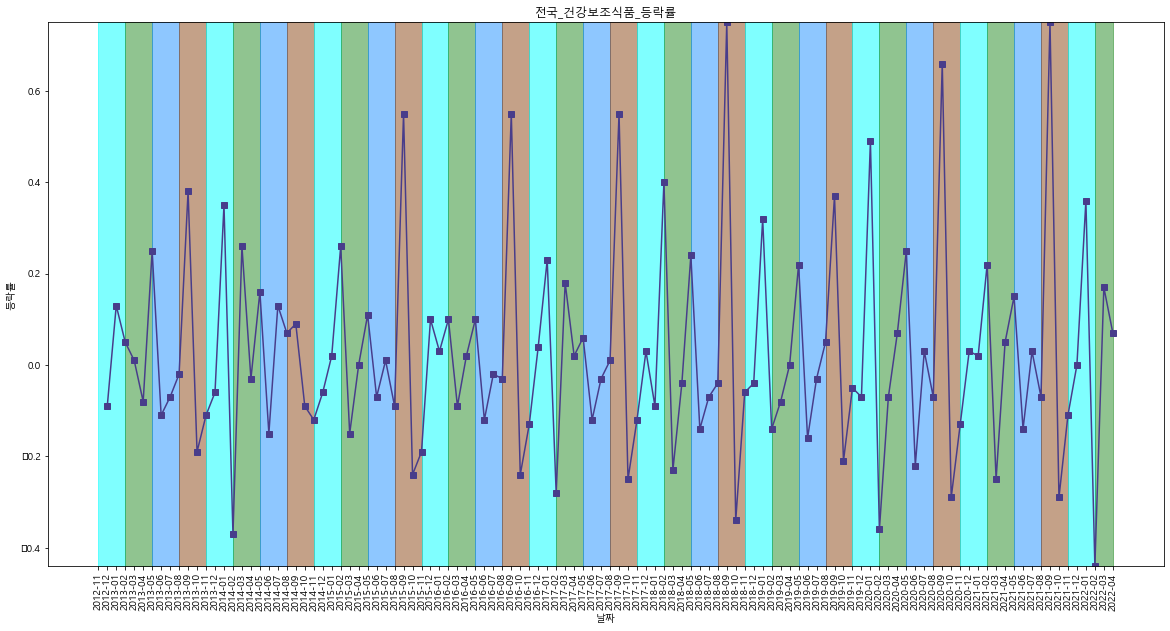

In [160]:

import matplotlib.pyplot as plt

plt.rcParams["font.family"] = "Malgun Gothic"

plt.figure(figsize=(20,10))
plt.xticks(rotation=90)

x = df1_he.index
y = df1_he["전국_건강보조식품_등락률"]

ymin, ymax = plt.ylim([df1_he["전국_건강보조식품_등락률"].min(), df1_he["전국_건강보조식품_등락률"].max()])

plt.fill_between(x[0:4], ymin, ymax, color='cyan', alpha=0.5)
plt.fill_between(x[3:7], ymin, ymax, color='forestgreen', alpha=0.5)
plt.fill_between(x[6:10], ymin, ymax, color='dodgerblue', alpha=0.5)
plt.fill_between(x[9:13], ymin, ymax, color='saddlebrown', alpha=0.5)
plt.fill_between(x[12:16], ymin, ymax, color='cyan', alpha=0.5)
plt.fill_between(x[15:19], ymin, ymax, color='forestgreen', alpha=0.5)
plt.fill_between(x[18:22], ymin, ymax, color='dodgerblue', alpha=0.5)
plt.fill_between(x[21:25], ymin, ymax, color='saddlebrown', alpha=0.5)
plt.fill_between(x[24:28], ymin, ymax, color='cyan', alpha=0.5)
plt.fill_between(x[27:31], ymin, ymax, color='forestgreen', alpha=0.5)
plt.fill_between(x[30:34], ymin, ymax, color='dodgerblue', alpha=0.5)
plt.fill_between(x[33:37], ymin, ymax, color='saddlebrown', alpha=0.5)
plt.fill_between(x[36:40], ymin, ymax, color='cyan', alpha=0.5)
plt.fill_between(x[39:43], ymin, ymax, color='forestgreen', alpha=0.5)
plt.fill_between(x[42:46], ymin, ymax, color='dodgerblue', alpha=0.5)
plt.fill_between(x[45:49], ymin, ymax, color='saddlebrown', alpha=0.5)
plt.fill_between(x[48:52], ymin, ymax, color='cyan', alpha=0.5)
plt.fill_between(x[51:55], ymin, ymax, color='forestgreen', alpha=0.5)
plt.fill_between(x[54:58], ymin, ymax, color='dodgerblue', alpha=0.5)
plt.fill_between(x[57:61], ymin, ymax, color='saddlebrown', alpha=0.5)
plt.fill_between(x[60:64], ymin, ymax, color='cyan', alpha=0.5)
plt.fill_between(x[63:67], ymin, ymax, color='forestgreen', alpha=0.5)
plt.fill_between(x[66:70], ymin, ymax, color='dodgerblue', alpha=0.5)
plt.fill_between(x[69:73], ymin, ymax, color='saddlebrown', alpha=0.5)
plt.fill_between(x[72:76], ymin, ymax, color='cyan', alpha=0.5)
plt.fill_between(x[75:79], ymin, ymax, color='forestgreen', alpha=0.5)
plt.fill_between(x[78:82], ymin, ymax, color='dodgerblue', alpha=0.5)
plt.fill_between(x[81:85], ymin, ymax, color='saddlebrown', alpha=0.5)
plt.fill_between(x[84:88], ymin, ymax, color='cyan', alpha=0.5)
plt.fill_between(x[87:91], ymin, ymax, color='forestgreen', alpha=0.5)
plt.fill_between(x[90:94], ymin, ymax, color='dodgerblue', alpha=0.5)
plt.fill_between(x[93:97], ymin, ymax, color='saddlebrown', alpha=0.5)
plt.fill_between(x[96:100], ymin, ymax, color='cyan', alpha=0.5)
plt.fill_between(x[99:103], ymin, ymax, color='forestgreen', alpha=0.5)
plt.fill_between(x[102:106], ymin, ymax, color='dodgerblue', alpha=0.5)
plt.fill_between(x[105:109], ymin, ymax, color='saddlebrown', alpha=0.5)
plt.fill_between(x[108:112], ymin, ymax, color='cyan', alpha=0.5)
plt.fill_between(x[111:115], ymin, ymax, color='forestgreen', alpha=0.5)
plt.fill_between(x[114:118], ymin, ymax, color='dodgerblue', alpha=0.5)
plt.fill_between(x[117:], ymin, ymax, color='saddlebrown', alpha=0.5)

plt.plot(df1_he["전국_건강보조식품_등락률"], color='darkslateblue',marker='s')

plt.title("전국_건강보조식품_등락률")
plt.xlabel("날짜")
plt.ylabel("등락률")
plt.show() 

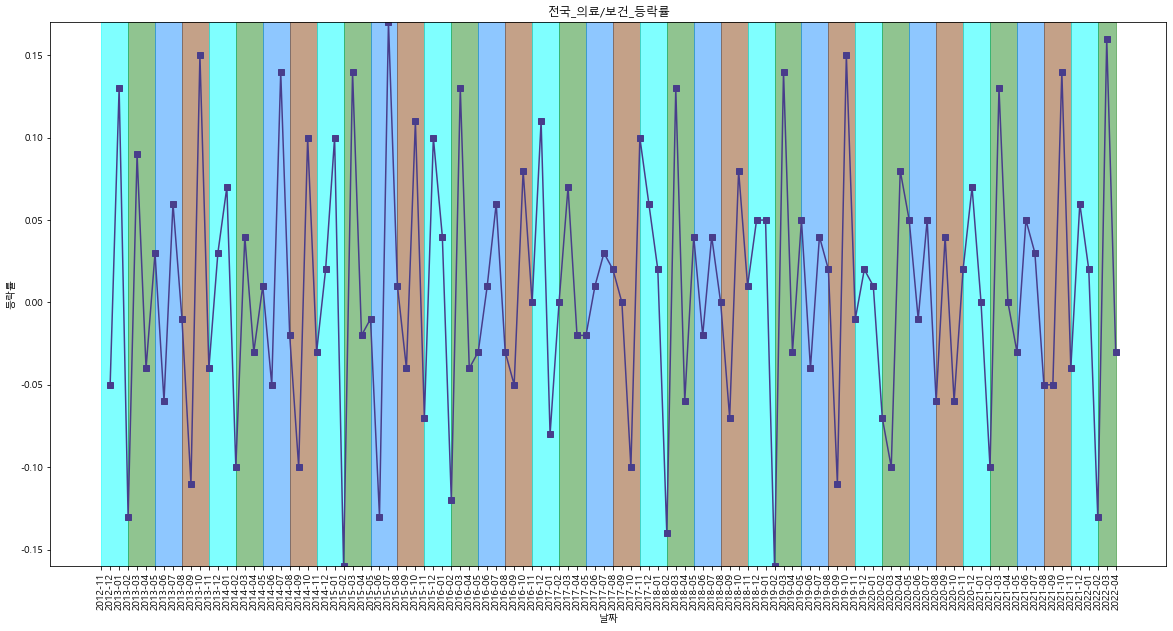

In [266]:
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = "Malgun Gothic"

plt.figure(figsize=(20,10))
plt.xticks(rotation=90)

x = df1_he.index
y = df1_he["전국_의료/보건_등락률"]

ymin, ymax = plt.ylim([df1_he["전국_의료/보건_등락률"].min(), df1_he["전국_의료/보건_등락률"].max()])

plt.fill_between(x[0:4], ymin, ymax, color='cyan', alpha=0.5)
plt.fill_between(x[3:7], ymin, ymax, color='forestgreen', alpha=0.5)
plt.fill_between(x[6:10], ymin, ymax, color='dodgerblue', alpha=0.5)
plt.fill_between(x[9:13], ymin, ymax, color='saddlebrown', alpha=0.5)
plt.fill_between(x[12:16], ymin, ymax, color='cyan', alpha=0.5)
plt.fill_between(x[15:19], ymin, ymax, color='forestgreen', alpha=0.5)
plt.fill_between(x[18:22], ymin, ymax, color='dodgerblue', alpha=0.5)
plt.fill_between(x[21:25], ymin, ymax, color='saddlebrown', alpha=0.5)
plt.fill_between(x[24:28], ymin, ymax, color='cyan', alpha=0.5)
plt.fill_between(x[27:31], ymin, ymax, color='forestgreen', alpha=0.5)
plt.fill_between(x[30:34], ymin, ymax, color='dodgerblue', alpha=0.5)
plt.fill_between(x[33:37], ymin, ymax, color='saddlebrown', alpha=0.5)
plt.fill_between(x[36:40], ymin, ymax, color='cyan', alpha=0.5)
plt.fill_between(x[39:43], ymin, ymax, color='forestgreen', alpha=0.5)
plt.fill_between(x[42:46], ymin, ymax, color='dodgerblue', alpha=0.5)
plt.fill_between(x[45:49], ymin, ymax, color='saddlebrown', alpha=0.5)
plt.fill_between(x[48:52], ymin, ymax, color='cyan', alpha=0.5)
plt.fill_between(x[51:55], ymin, ymax, color='forestgreen', alpha=0.5)
plt.fill_between(x[54:58], ymin, ymax, color='dodgerblue', alpha=0.5)
plt.fill_between(x[57:61], ymin, ymax, color='saddlebrown', alpha=0.5)
plt.fill_between(x[60:64], ymin, ymax, color='cyan', alpha=0.5)
plt.fill_between(x[63:67], ymin, ymax, color='forestgreen', alpha=0.5)
plt.fill_between(x[66:70], ymin, ymax, color='dodgerblue', alpha=0.5)
plt.fill_between(x[69:73], ymin, ymax, color='saddlebrown', alpha=0.5)
plt.fill_between(x[72:76], ymin, ymax, color='cyan', alpha=0.5)
plt.fill_between(x[75:79], ymin, ymax, color='forestgreen', alpha=0.5)
plt.fill_between(x[78:82], ymin, ymax, color='dodgerblue', alpha=0.5)
plt.fill_between(x[81:85], ymin, ymax, color='saddlebrown', alpha=0.5)
plt.fill_between(x[84:88], ymin, ymax, color='cyan', alpha=0.5)
plt.fill_between(x[87:91], ymin, ymax, color='forestgreen', alpha=0.5)
plt.fill_between(x[90:94], ymin, ymax, color='dodgerblue', alpha=0.5)
plt.fill_between(x[93:97], ymin, ymax, color='saddlebrown', alpha=0.5)
plt.fill_between(x[96:100], ymin, ymax, color='cyan', alpha=0.5)
plt.fill_between(x[99:103], ymin, ymax, color='forestgreen', alpha=0.5)
plt.fill_between(x[102:106], ymin, ymax, color='dodgerblue', alpha=0.5)
plt.fill_between(x[105:109], ymin, ymax, color='saddlebrown', alpha=0.5)
plt.fill_between(x[108:112], ymin, ymax, color='cyan', alpha=0.5)
plt.fill_between(x[111:115], ymin, ymax, color='forestgreen', alpha=0.5)
plt.fill_between(x[114:118], ymin, ymax, color='dodgerblue', alpha=0.5)
plt.fill_between(x[117:], ymin, ymax, color='saddlebrown', alpha=0.5)

plt.plot(df1_he["전국_의료/보건_등락률"], color='darkslateblue',marker='s')

plt.title("전국_의료/보건_등락률")
plt.xlabel("날짜")
plt.ylabel("등락률")
plt.show() 

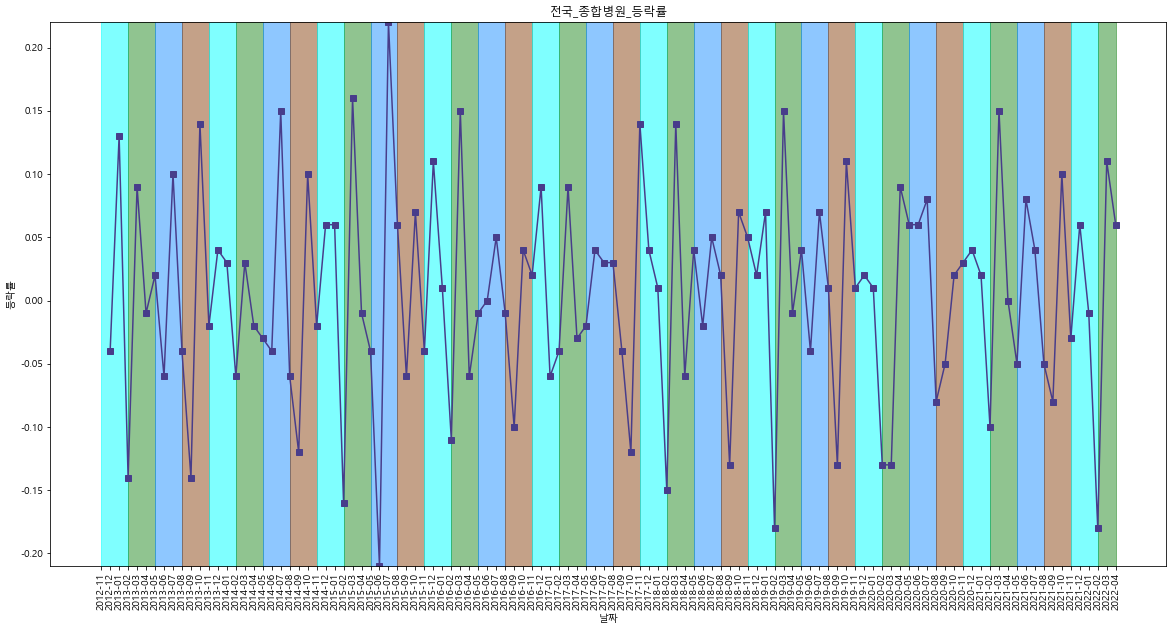

In [267]:
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = "Malgun Gothic"

plt.figure(figsize=(20,10))
plt.xticks(rotation=90)

x = df1_he.index
y = df1_he["전국_종합병원_등락률"]

ymin, ymax = plt.ylim([df1_he["전국_종합병원_등락률"].min(), df1_he["전국_종합병원_등락률"].max()])

plt.fill_between(x[0:4], ymin, ymax, color='cyan', alpha=0.5)
plt.fill_between(x[3:7], ymin, ymax, color='forestgreen', alpha=0.5)
plt.fill_between(x[6:10], ymin, ymax, color='dodgerblue', alpha=0.5)
plt.fill_between(x[9:13], ymin, ymax, color='saddlebrown', alpha=0.5)
plt.fill_between(x[12:16], ymin, ymax, color='cyan', alpha=0.5)
plt.fill_between(x[15:19], ymin, ymax, color='forestgreen', alpha=0.5)
plt.fill_between(x[18:22], ymin, ymax, color='dodgerblue', alpha=0.5)
plt.fill_between(x[21:25], ymin, ymax, color='saddlebrown', alpha=0.5)
plt.fill_between(x[24:28], ymin, ymax, color='cyan', alpha=0.5)
plt.fill_between(x[27:31], ymin, ymax, color='forestgreen', alpha=0.5)
plt.fill_between(x[30:34], ymin, ymax, color='dodgerblue', alpha=0.5)
plt.fill_between(x[33:37], ymin, ymax, color='saddlebrown', alpha=0.5)
plt.fill_between(x[36:40], ymin, ymax, color='cyan', alpha=0.5)
plt.fill_between(x[39:43], ymin, ymax, color='forestgreen', alpha=0.5)
plt.fill_between(x[42:46], ymin, ymax, color='dodgerblue', alpha=0.5)
plt.fill_between(x[45:49], ymin, ymax, color='saddlebrown', alpha=0.5)
plt.fill_between(x[48:52], ymin, ymax, color='cyan', alpha=0.5)
plt.fill_between(x[51:55], ymin, ymax, color='forestgreen', alpha=0.5)
plt.fill_between(x[54:58], ymin, ymax, color='dodgerblue', alpha=0.5)
plt.fill_between(x[57:61], ymin, ymax, color='saddlebrown', alpha=0.5)
plt.fill_between(x[60:64], ymin, ymax, color='cyan', alpha=0.5)
plt.fill_between(x[63:67], ymin, ymax, color='forestgreen', alpha=0.5)
plt.fill_between(x[66:70], ymin, ymax, color='dodgerblue', alpha=0.5)
plt.fill_between(x[69:73], ymin, ymax, color='saddlebrown', alpha=0.5)
plt.fill_between(x[72:76], ymin, ymax, color='cyan', alpha=0.5)
plt.fill_between(x[75:79], ymin, ymax, color='forestgreen', alpha=0.5)
plt.fill_between(x[78:82], ymin, ymax, color='dodgerblue', alpha=0.5)
plt.fill_between(x[81:85], ymin, ymax, color='saddlebrown', alpha=0.5)
plt.fill_between(x[84:88], ymin, ymax, color='cyan', alpha=0.5)
plt.fill_between(x[87:91], ymin, ymax, color='forestgreen', alpha=0.5)
plt.fill_between(x[90:94], ymin, ymax, color='dodgerblue', alpha=0.5)
plt.fill_between(x[93:97], ymin, ymax, color='saddlebrown', alpha=0.5)
plt.fill_between(x[96:100], ymin, ymax, color='cyan', alpha=0.5)
plt.fill_between(x[99:103], ymin, ymax, color='forestgreen', alpha=0.5)
plt.fill_between(x[102:106], ymin, ymax, color='dodgerblue', alpha=0.5)
plt.fill_between(x[105:109], ymin, ymax, color='saddlebrown', alpha=0.5)
plt.fill_between(x[108:112], ymin, ymax, color='cyan', alpha=0.5)
plt.fill_between(x[111:115], ymin, ymax, color='forestgreen', alpha=0.5)
plt.fill_between(x[114:118], ymin, ymax, color='dodgerblue', alpha=0.5)
plt.fill_between(x[117:], ymin, ymax, color='saddlebrown', alpha=0.5)

plt.plot(df1_he["전국_종합병원_등락률"], color='darkslateblue',marker='s')

plt.title("전국_종합병원_등락률")
plt.xlabel("날짜")
plt.ylabel("등락률")
plt.show() 

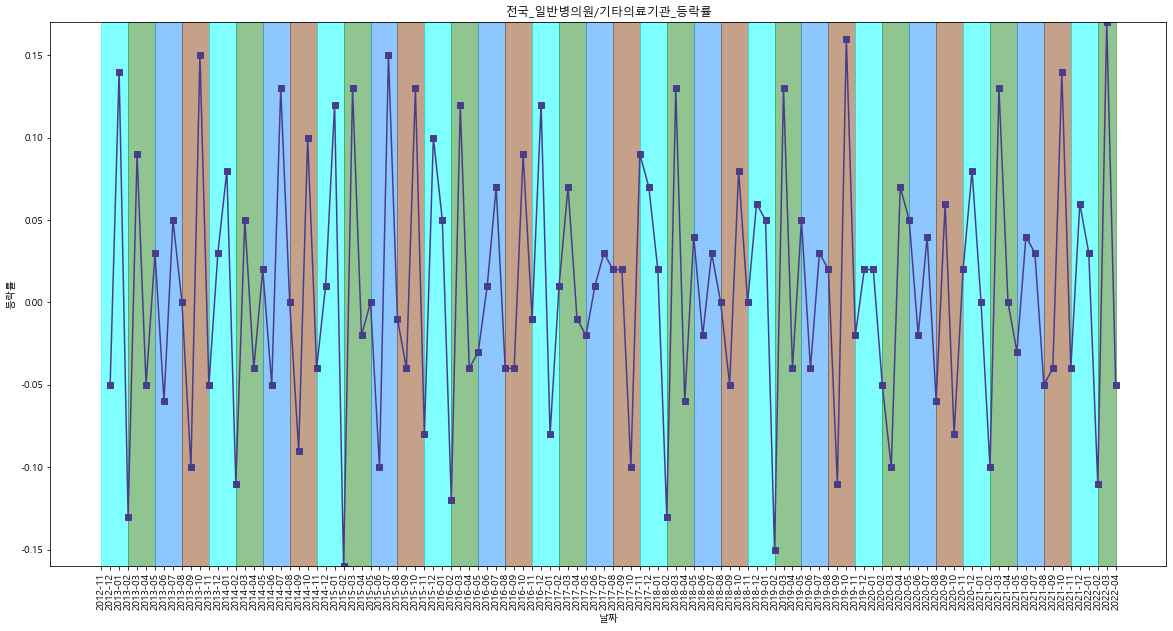

In [268]:
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = "Malgun Gothic"

plt.figure(figsize=(20,10))
plt.xticks(rotation=90)

x = df1_he.index
y = df1_he["전국_일반병의원/기타의료기관_등락률"]

ymin, ymax = plt.ylim([df1_he["전국_일반병의원/기타의료기관_등락률"].min(), df1_he["전국_일반병의원/기타의료기관_등락률"].max()])

plt.fill_between(x[0:4], ymin, ymax, color='cyan', alpha=0.5)
plt.fill_between(x[3:7], ymin, ymax, color='forestgreen', alpha=0.5)
plt.fill_between(x[6:10], ymin, ymax, color='dodgerblue', alpha=0.5)
plt.fill_between(x[9:13], ymin, ymax, color='saddlebrown', alpha=0.5)
plt.fill_between(x[12:16], ymin, ymax, color='cyan', alpha=0.5)
plt.fill_between(x[15:19], ymin, ymax, color='forestgreen', alpha=0.5)
plt.fill_between(x[18:22], ymin, ymax, color='dodgerblue', alpha=0.5)
plt.fill_between(x[21:25], ymin, ymax, color='saddlebrown', alpha=0.5)
plt.fill_between(x[24:28], ymin, ymax, color='cyan', alpha=0.5)
plt.fill_between(x[27:31], ymin, ymax, color='forestgreen', alpha=0.5)
plt.fill_between(x[30:34], ymin, ymax, color='dodgerblue', alpha=0.5)
plt.fill_between(x[33:37], ymin, ymax, color='saddlebrown', alpha=0.5)
plt.fill_between(x[36:40], ymin, ymax, color='cyan', alpha=0.5)
plt.fill_between(x[39:43], ymin, ymax, color='forestgreen', alpha=0.5)
plt.fill_between(x[42:46], ymin, ymax, color='dodgerblue', alpha=0.5)
plt.fill_between(x[45:49], ymin, ymax, color='saddlebrown', alpha=0.5)
plt.fill_between(x[48:52], ymin, ymax, color='cyan', alpha=0.5)
plt.fill_between(x[51:55], ymin, ymax, color='forestgreen', alpha=0.5)
plt.fill_between(x[54:58], ymin, ymax, color='dodgerblue', alpha=0.5)
plt.fill_between(x[57:61], ymin, ymax, color='saddlebrown', alpha=0.5)
plt.fill_between(x[60:64], ymin, ymax, color='cyan', alpha=0.5)
plt.fill_between(x[63:67], ymin, ymax, color='forestgreen', alpha=0.5)
plt.fill_between(x[66:70], ymin, ymax, color='dodgerblue', alpha=0.5)
plt.fill_between(x[69:73], ymin, ymax, color='saddlebrown', alpha=0.5)
plt.fill_between(x[72:76], ymin, ymax, color='cyan', alpha=0.5)
plt.fill_between(x[75:79], ymin, ymax, color='forestgreen', alpha=0.5)
plt.fill_between(x[78:82], ymin, ymax, color='dodgerblue', alpha=0.5)
plt.fill_between(x[81:85], ymin, ymax, color='saddlebrown', alpha=0.5)
plt.fill_between(x[84:88], ymin, ymax, color='cyan', alpha=0.5)
plt.fill_between(x[87:91], ymin, ymax, color='forestgreen', alpha=0.5)
plt.fill_between(x[90:94], ymin, ymax, color='dodgerblue', alpha=0.5)
plt.fill_between(x[93:97], ymin, ymax, color='saddlebrown', alpha=0.5)
plt.fill_between(x[96:100], ymin, ymax, color='cyan', alpha=0.5)
plt.fill_between(x[99:103], ymin, ymax, color='forestgreen', alpha=0.5)
plt.fill_between(x[102:106], ymin, ymax, color='dodgerblue', alpha=0.5)
plt.fill_between(x[105:109], ymin, ymax, color='saddlebrown', alpha=0.5)
plt.fill_between(x[108:112], ymin, ymax, color='cyan', alpha=0.5)
plt.fill_between(x[111:115], ymin, ymax, color='forestgreen', alpha=0.5)
plt.fill_between(x[114:118], ymin, ymax, color='dodgerblue', alpha=0.5)
plt.fill_between(x[117:], ymin, ymax, color='saddlebrown', alpha=0.5)

plt.plot(df1_he["전국_일반병의원/기타의료기관_등락률"], color='darkslateblue',marker='s')

plt.title("전국_일반병의원/기타의료기관_등락률")
plt.xlabel("날짜")
plt.ylabel("등락률")
plt.show() 

<AxesSubplot:xlabel='날짜'>

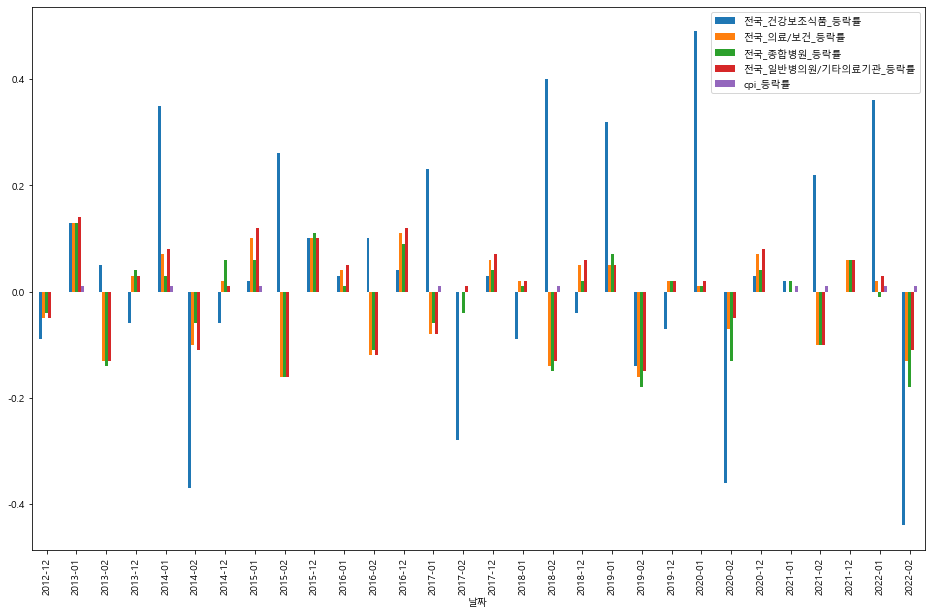

In [269]:
df1_he.groupby("계절").get_group("겨울").plot(kind="bar", figsize=(16,10))

<AxesSubplot:xlabel='날짜'>

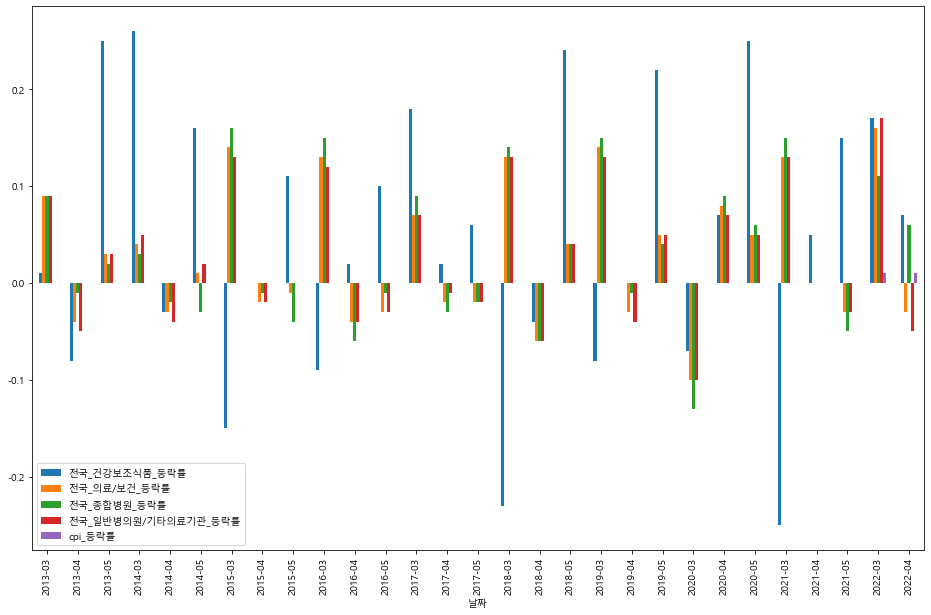

In [270]:
df1_he.groupby("계절").get_group("봄").plot(kind="bar", figsize=(16,10))

<AxesSubplot:xlabel='날짜'>

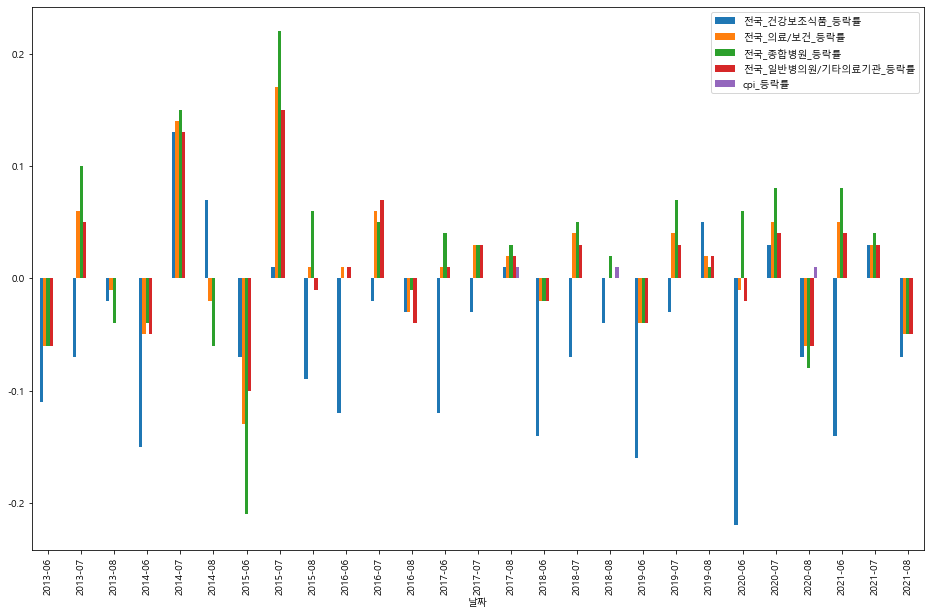

In [271]:
df1_he.groupby("계절").get_group("여름").plot(kind="bar", figsize=(16,10))

<AxesSubplot:xlabel='날짜'>

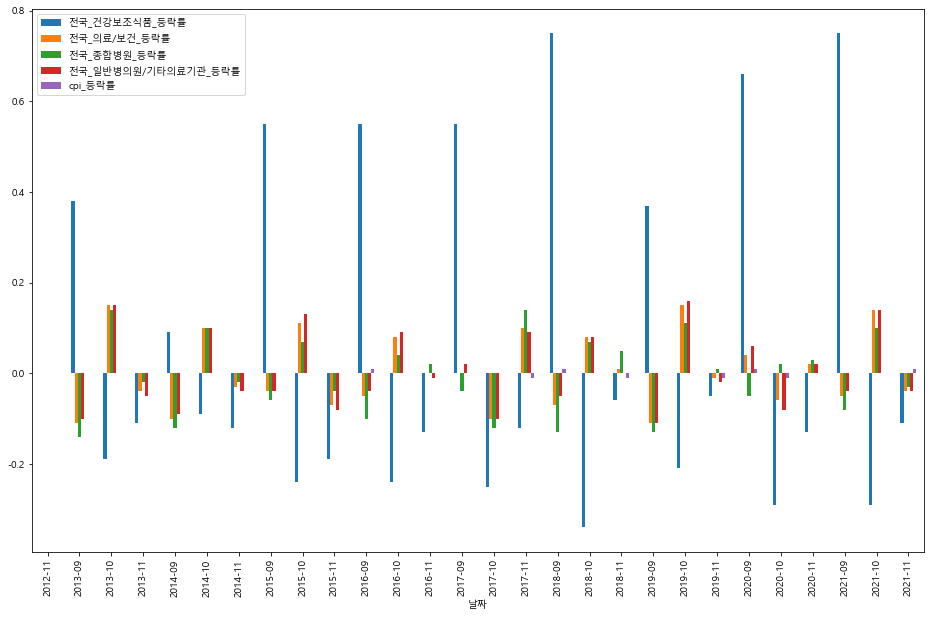

In [272]:
df1_he.groupby("계절").get_group("가을").plot(kind="bar", figsize=(16,10))

In [277]:
import numpy as np

std = np.std(df1_he)
print(std)

전국_건강보조식품_등락률          0.226285
전국_의료/보건_등락률           0.076816
전국_종합병원_등락률            0.084589
전국_일반병의원/기타의료기관_등락률    0.076327
cpi_등락률                0.004235
dtype: float64


c:\Users\82104\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:3613: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


c:\Users\82104\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='전국_의료/보건_등락률', ylabel='Density'>

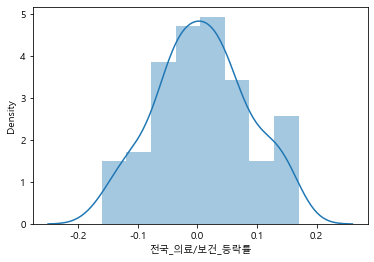

In [276]:
# 히스토그램
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["font.family"] = "Malgun Gothic"

sns.distplot(df1_he["전국_의료/보건_등락률"])